# 1. 데이터 train_data와 test_test로 분류하기

 - datset에는 총 16000장의 병충해 이미지 데이터가 있다.
 - label.json에는 총 12800장에 대한 라벨링이 되어 있음 = train_data로 이용
 - 따라서 datset에서 label.json에 없는 이미지(라벨링이 되지 않은 이미지)를 따로 빼서 test_data에 저장해야한다.
 - 이후 ImageFolder를 이용하기 위해 train_data를 라벨별로 폴더를 생성하여 나눠준다.

In [29]:
import os
import json

path_dir = './datset'

file_list = os.listdir(path_dir) # 사이즈 16000개
test_list = os.listdir(path_dir)

file = open('./label.json')
jsonString = json.load(file)
train_list = []
for i in jsonString['train']:
    train_list.append(i[0])
# train_list 총 12800개

for i in train_list:
    test_list.remove(i)
# 전체 데이터에서 train데이터삭제 후 남은 데이터 = test데이터(3200개)

In [30]:
import shutil
#src에 있는 파일을 dir로 이동.
src = './datset/'
dir_test = './test_data/'
dir_train = './train_data/'
for filename in test_list:
    shutil.move(src+filename, dir_test+filename)

for filename in train_list:
    shutil.move(src+filename, dir_train+filename)

# 이미지 폴더로 분류 완료

In [31]:
# train_data에서 라벨별로 분류

import os
import json
import shutil
path_dir = './train_data'

file_list = os.listdir(path_dir) # 사이즈 12800개
file = open('./label.json')
jsonString = json.load(file)

for file_name, label in jsonString['train']:
    src = './train_data/' + file_name
    dest = './train_data/' + str(label) +'/'
    if not os.path.exists(dest):
        os.makedirs(dest)
    else:
        shutil.move(src, dest+file_name)

In [32]:
num6=num8=num11=num13=num14=num15=num17=num19=num22=num23=num25=num27=num28=num29=num30=num31=num33 = 0
for file_name, label in jsonString['train']:
    if label == 6:
        num6 += 1
    elif label == 8:
        num8 += 1
    elif label == 11:
        num11 += 1
    elif label == 13:
        num13 += 1
    elif label == 14:
        num14 += 1
    elif label == 15:
        num15 += 1
    elif label == 17:
        num17 += 1
    elif label == 19:
        num19 += 1
    elif label == 22:
        num22 += 1
    elif label == 23:
        num23 += 1
    elif label == 25:
        num25 += 1
    elif label == 27:
        num27 += 1
    elif label == 28:
        num28 += 1  
    elif label == 29:
        num29 += 1    
    elif label == 30:
        num30 += 1
    elif label == 31:
        num31 += 1
    elif label == 33:
        num33 += 1                         
print(num6, num8, num11, num13, num14, num15, num17, num19, num22, num23, num25, num27, num28, num29, num30, num31, num33)
print(num6+num8+num11+num13+num14+num15+num17+num19+num22+num23+num25+num27+num28+num29+num30+num31+num33)

639 1290 638 647 1304 640 650 628 641 628 643 644 626 626 1275 633 648
12800


# 2. train dataset 이미지를 전처리하기

- transpose를 이용해서 전처리하기
- image augmentation을 이용하기
- 딥러닝 모델에 맞게 사이즈 줄이기


In [13]:
import torchvision
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim


In [14]:
trans = transforms.Compose([transforms.Resize((32,32)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,),(0.5,))
                                ])

train_data = datasets.ImageFolder(root = './train_data/', transform = trans)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './train_data/'

In [9]:
# for num, value in enumerate(train_data):
#     data, label = value
#     print(num, data, label)

# len(train_data)
# classes = train_data.classes
# classes

In [47]:
trainloader = DataLoader(train_data, batch_size = 100, shuffle=True)

In [48]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)
len(labels)

tensor([ 5, 12,  9,  0,  6, 15, 12,  0, 12,  2, 15,  3,  7,  1, 10, 11, 12, 16,
        14,  0, 12,  9,  5,  1, 10, 16, 16,  5,  1,  2,  2,  6, 16,  6, 13,  7,
        14,  2, 16, 14,  8,  2,  2,  8,  3,  2, 10,  3,  2,  6,  8,  8,  0,  6,
         5, 12,  1, 12,  4,  1,  9, 12, 14, 14,  2, 15, 15, 16,  2,  6,  8,  7,
        15,  6,  5,  4,  4,  4,  1,  0, 16, 16, 12, 11,  2, 12, 12, 11, 12, 11,
         6, 10, 14, 13, 15, 11,  0, 10,  5,  2])


100

In [49]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()# tensor 복사 후 numpy()
  image = image.transpose(1,2,0) # i,j,k -> j,k,i로 transpose
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1) # 0보다 작은 값은 0으로, 1보다 큰 값들은 1으로
  return image

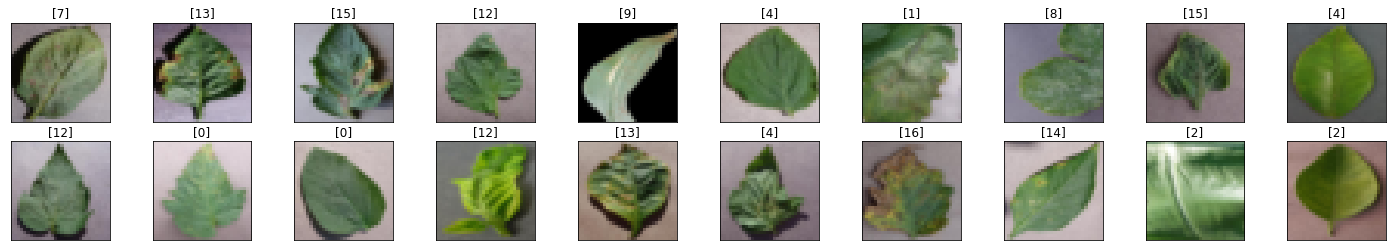

In [50]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [ ]:
train

# 3. VGG16 모델을 데이터에 맞게 바꾸기
 - 최종 output class 갯수 맞춰주기
 - input이랑 더 바꿔야할 것 같은데 아직 정확히 모르겠다.
 - 이미지 bathsize랑 등등 더 자세히 공부하자
 

In [19]:
import torch
import torch.nn as nn

In [20]:
__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]


model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [21]:
class VGG(nn.Module):

    def __init__(self, features, num_classes= 1000, init_weights = True):
        super(VGG, self).__init__()
        self.features = features # 우리가 쌓아야할 convolution layer들
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential( # fully connected layer 3개
            nn.Linear(512 * 7 * 7, 4096), # 수정이 필요한 부분
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes), # num_classes 갯수로 classification
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x) # convolution layer
        x = self.avgpool(x) # avg pooling
        x = torch.flatten(x, 1)
        x = self.classifier(x) # 위에서 정의한 fc layer
        return x

    def _initialize_weights(self): # 가중치 정의 부분 (feature가 가지고 있는 weight(convolution)이나 m(pooling)을 전달)
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [22]:
def make_layers(cfg, batch_norm = False):
    layers= []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

In [23]:
cfgs = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # VGG 11
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # VGG 13
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],# VGG 16
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # VGG 19
}

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [25]:
conv = make_layers(cfgs['D'])
vgg16 = VGG(conv, num_classes = 17, init_weights = True).to(device)

In [11]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [27]:
    a = torch.Tensor(1, 3,32,32).to(device) # image수, channel수, heightm, width;
    out = vgg16(a)
    print(out)

tensor([[ 5.8219e+33, -3.9767e+34, -7.9519e+33, -9.3247e+33,  7.9675e+33,
         -2.4476e+34,  3.6233e+34,  2.2869e+34, -7.2278e+33,  8.2269e+34,
         -4.0837e+34,  5.3841e+34, -2.9512e+34, -6.8904e+34,  4.4568e+34,
         -2.9471e+33, -1.2003e+34]], grad_fn=<AddmmBackward>)


In [61]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(vgg16.parameters(), lr=0.005, momentum=0.9)
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size = 5, gamma = 0.9)

In [69]:
print(len(trainloader))
epochs=30

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    running_corrects = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # zero the parameter gradients
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss/len(trainloader)
        epoch_acc = running_corrects.float()/ len(trainloader)
        print('epoch :', (epoch+1))
        print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))

print('Finished Training')

och : 27
training loss: 1.6965, acc 6.3984 
epoch : 27
training loss: 1.7185, acc 6.4609 
epoch : 27
training loss: 1.7401, acc 6.5469 
epoch : 27
training loss: 1.7617, acc 6.6328 
epoch : 27
training loss: 1.7831, acc 6.7266 
epoch : 27
training loss: 1.8049, acc 6.8203 
epoch : 27
training loss: 1.8263, acc 6.9141 
epoch : 27
training loss: 1.8477, acc 7.0391 
epoch : 27
training loss: 1.8688, acc 7.1562 
epoch : 27
training loss: 1.8907, acc 7.1875 
epoch : 27
training loss: 1.9131, acc 7.2500 
epoch : 27
training loss: 1.9347, acc 7.3203 
epoch : 27
training loss: 1.9557, acc 7.4062 
epoch : 27
training loss: 1.9770, acc 7.4766 
epoch : 27
training loss: 1.9984, acc 7.5547 
epoch : 27
training loss: 2.0198, acc 7.6484 
epoch : 27
training loss: 2.0405, acc 7.7578 
epoch : 27
training loss: 2.0615, acc 7.8672 
epoch : 27
training loss: 2.0829, acc 7.9453 
epoch : 27
training loss: 2.1045, acc 8.0234 
epoch : 27
training loss: 2.1258, acc 8.1016 
epoch : 27
training loss: 2.1474, ac

In [74]:
PATH = './'
torch.save(vgg16.state_dict(), PATH + 'vgg.pt')
torch.save(vgg16.state_dict(), PATH + 'vgg_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save({
    'model': vgg16.state_dict(),
    'optimizer': optimizer.state_dict()
}, PATH + 'all.tar')

In [79]:
# trans = transforms.Compose([transforms.Resize((32,32)),
#                                 transforms.ToTensor(), 
#                                 transforms.Normalize((0.5,),(0.5,))
#                                 ])

# test_data = datasets.ImageFolder(root = './test_data/', transform = trans)




RuntimeError: Found 0 files in subfolders of: ./test_data/
Supported extensions are: .jpg,.jpeg,.png,.ppm,.bmp,.pgm,.tif,.tiff,.webp